In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [6]:
df = df.iloc[:, :2]
df.columns = ["label", "message"]

In [7]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})

In [8]:
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["message"])
y = df["label"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = naive_bayes.predict(X_test)

In [12]:
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.4f}")

Model Accuracy: 0.9763


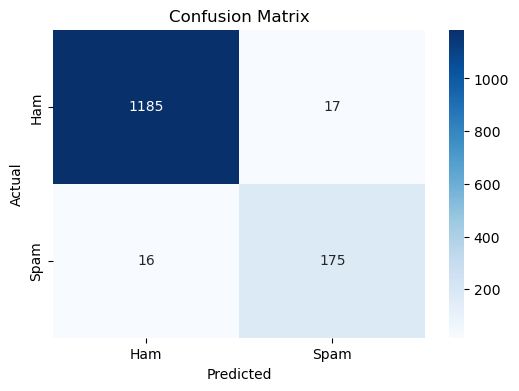

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19176\813328303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette=["blue", "orange"])


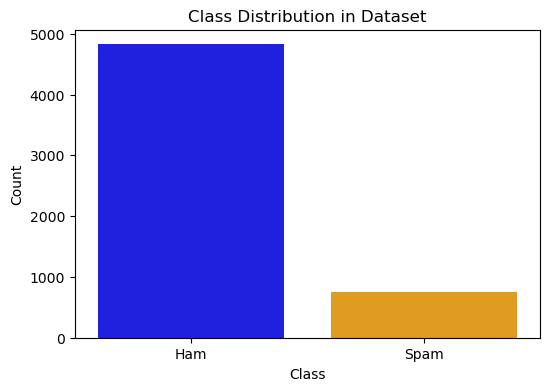

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"], palette=["blue", "orange"])
plt.xticks(ticks=[0, 1], labels=["Ham", "Spam"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()